In [1]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import string
import nltk
import seaborn as sns
from nltk.stem import WordNetLemmatizer

In [2]:
# Read the CSV file
Stress = pd.read_csv('Stress.csv')

In [3]:
#view the first 5 rows of the dataset
Stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [4]:
Stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


In [5]:
Stress.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [6]:
Stress.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [7]:
Stress.shape

(2838, 7)

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Tokenization and Preprocessing
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stopwords and token not in punctuation]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


In [10]:
# Apply tokenization and preprocessing
Stress['preprocessed_text'] = Stress['text'].apply(preprocess_text)

In [11]:
#view the first 5 rows of the dataset
Stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,preprocessed_text
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353,said felt way suggeted go rest .. trigger ahea...
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817,hey r/assistance sure right place post .. go '...
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605,mom hit newspaper shocked would know n't like ...
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555,met new boyfriend amazing kind sweet good stud...
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005,october domestic violence awareness month dome...


In [12]:
#WordCloud visualization
text_combined = " ".join(Stress['preprocessed_text']) 
wordcloud = WordCloud(width=800, height=200, background_color='white').generate(text_combined)

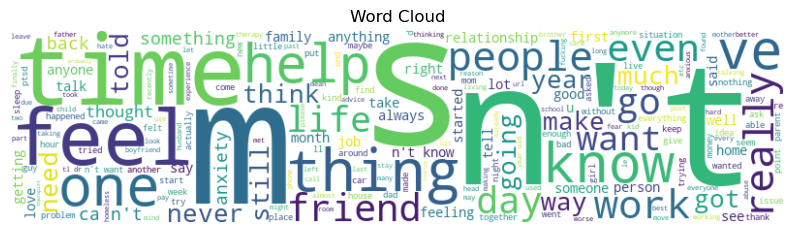

In [13]:
#plot the WordCloud
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Word Cloud') 
plt.show()

In [14]:
# Vectorize the preprocessed text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(Stress['preprocessed_text'])
y = Stress['label']

In [15]:
#Split the text into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [16]:
y.value_counts()

1    1488
0    1350
Name: label, dtype: int64

In [17]:
#Initialize the classification model and train it
classifier = LogisticRegression() 
classifier.fit(X_train, y_train)

LogisticRegression()

In [18]:
#view the predicted outcome of the test set
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [20]:
#Check the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7288732394366197

In [21]:
#Check the precision of the model
precision = metrics.precision_score(y_test, y_pred)
precision

0.7475409836065574

In [22]:
#Check the sensitivity of the model
sensitivity = metrics.recall_score(y_test, y_pred)
sensitivity

0.7475409836065574

In [23]:
#Check the f1-score of the model
f1_score = metrics.f1_score(y_test, y_pred)
f1_score

0.7475409836065574

In [24]:
#Check the ROC-AUC score of the model
roc_auc = metrics.roc_auc_score(y_test, y_pred)
roc_auc

0.727382659103659

In [25]:
#Check the confusion matrix of the model
confmax = metrics.confusion_matrix(y_test, y_pred)
confmax

array([[186,  77],
       [ 77, 228]], dtype=int64)

In [26]:
#View the classification report of the model
classification_report = classification_report(y_test, y_pred) 
print("Text Classification Report:") 
print(classification_report)

Text Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       263
           1       0.75      0.75      0.75       305

    accuracy                           0.73       568
   macro avg       0.73      0.73      0.73       568
weighted avg       0.73      0.73      0.73       568



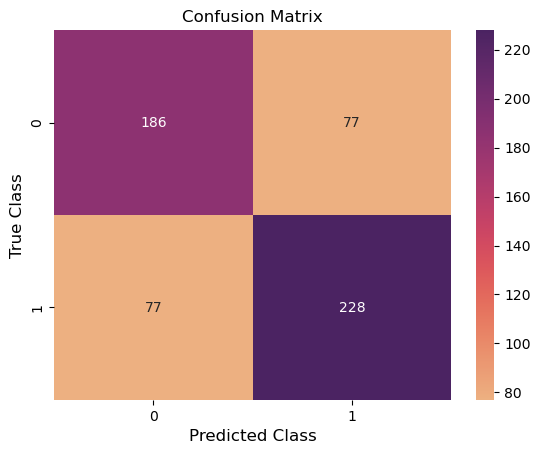

In [27]:
#visualize the confusion matrix
ax = sns.heatmap(confmax, cmap = 'flare', annot= True, fmt = 'd')
plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 12)
plt.show()

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
#Perform the sentiment analysis
sia = SentimentIntensityAnalyzer()
Stress['SIA_Sentiment'] = Stress['text'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else 'negative')

In [30]:
#view the SIA sentiment
Stress.SIA_Sentiment

0       negative
1       positive
2       negative
3       negative
4       negative
          ...   
2833    positive
2834    negative
2835    positive
2836    positive
2837    negative
Name: SIA_Sentiment, Length: 2838, dtype: object

In [31]:
#Print the sentiment analysis results
print("\nSentiment Analysis Results:") 
print(Stress[['text', 'label', 'SIA_Sentiment']])


Sentiment Analysis Results:
                                                   text  label SIA_Sentiment
0     He said he had not felt that way before, sugge...      1      negative
1     Hey there r/assistance, Not sure if this is th...      0      positive
2     My mom then hit me with the newspaper and it s...      1      negative
3     until i met my new boyfriend, he is amazing, h...      1      negative
4     October is Domestic Violence Awareness Month a...      1      negative
...                                                 ...    ...           ...
2833  * Her, a week ago: Precious, how are you? (I i...      0      positive
2834  I don't have the ability to cope with it anymo...      1      negative
2835  In case this is the first time you're reading ...      0      positive
2836  Do you find this normal? They have a good rela...      0      positive
2837  I was talking to my mom this morning and she s...      1      negative

[2838 rows x 3 columns]


In [32]:
Stress

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,preprocessed_text,SIA_Sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.800000,1521614353,said felt way suggeted go rest .. trigger ahea...,negative
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.000000,1527009817,hey r/assistance sure right place post .. go '...,positive
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.800000,1535935605,mom hit newspaper shocked would know n't like ...,negative
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.600000,1516429555,met new boyfriend amazing kind sweet good stud...,negative
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.800000,1539809005,october domestic violence awareness month dome...,negative
...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",0,1.000000,1515187044,week ago precious ignored jan 1 happy year pre...,positive
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1,1.000000,1539827412,n't ability cope anymore 'm trying lot thing t...,negative
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,0,1.000000,1539269312,case first time 're reading post ... looking p...,positive
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,0,0.571429,1488938143,find normal good relationship main problem see...,positive


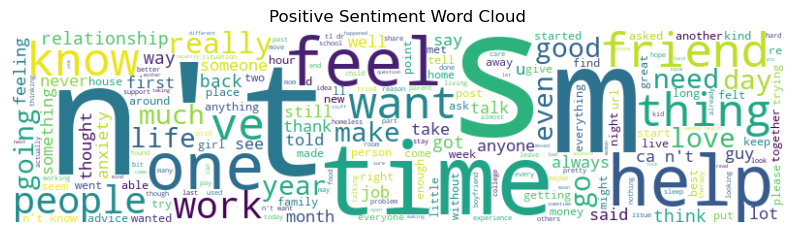

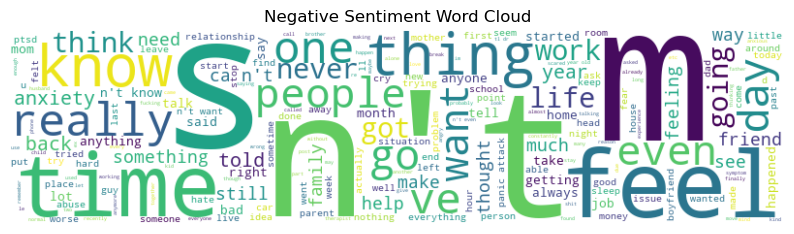

In [33]:
#Plot a wordcloud for the two sentiment categories
# WordCloud visualization for positive sentiment
positive_text = " ".join(Stress[Stress['SIA_Sentiment'] == 'positive']['preprocessed_text'])
positive_wordcloud = WordCloud(width=800, height=200, background_color='white').generate(positive_text)

# Plot the positive WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

# WordCloud visualization for negative sentiment
negative_text = " ".join(Stress[Stress['SIA_Sentiment'] == 'negative']['preprocessed_text'])
negative_wordcloud = WordCloud(width=800, height=200, background_color='white').generate(negative_text)

# Plot the negative WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()